Implementing a fuzzy logic controller for a washing machine involves several steps, including defining the fuzzy sets, membership functions, rules, and the inference system. Below is an outline of the process to build the fuzzy logic model from scratch:

Define Input and Output Variables:

Input Variable: Dirtiness (range: 0-10)
Output Variable: Washing Time (range: 0-100 minutes)
Linguistic Variables and Membership Functions:

Dirtiness: Low, Medium, High (Triangular or Trapezoidal membership functions)
Washing Time: Short, Medium, Long (Triangular or Trapezoidal membership functions)
Fuzzy Rules:

Define a set of fuzzy rules based on the input-output relationship. For example:
IF Dirtiness is Low THEN Washing Time is Short
IF Dirtiness is Medium THEN Washing Time is Medium
IF Dirtiness is High THEN Washing Time is Long
Fuzzy Inference:

Apply fuzzy logic operators (AND, OR) to combine the fuzzy sets and rules to determine the output fuzzy set.
Use fuzzy inference methods such as Mamdani or Sugeno to calculate the output fuzzy set based on the input variables and rules.
Defuzzification:

Convert the fuzzy output set into a crisp value (washing time) using defuzzification methods like the centroid, mean of maximum, or weighted average.
Implement the Fuzzy Logic Controller:

Write code to define the membership functions, rules, and inference system.
Implement the fuzzy logic operations (AND, OR) and defuzzification method.
Testing and Optimization:

Validate the fuzzy logic controller by testing it with various input scenarios and comparing the output with expected results.
Fine-tune the membership functions, rules, and parameters to optimize the performance of the controller.
Note: Building a complete fuzzy logic model for a washing machine from scratch involves detailed mathematical and programming implementation. It requires a solid understanding of fuzzy logic theory, fuzzy inference systems, and programming skills. It is recommended to consult relevant literature, research papers, and fuzzy logic resources for a more comprehensive and accurate implementation.

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=3b04b63fef7e75f53b92ba37f886c86000884b6ca30552a9940b68926813ab69
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


import numpy as np and import skfuzzy as fuzz: These lines import the necessary libraries. numpy is used for numerical computations, and skfuzzy is the scikit-fuzzy library used for fuzzy logic operations.

from skfuzzy import control as ctrl: This line imports the control module from scikit-fuzzy, which contains classes and functions for defining and simulating fuzzy control systems.

dirtiness = ctrl.Antecedent(np.arange(0, 11, 1), 'dirtiness') and washing_time = ctrl.Consequent(np.arange(0, 101, 1), 'washing_time'): These lines define the input and output variables for the fuzzy logic controller. The Antecedent class represents the input variable 'dirtiness', and the Consequent class represents the output variable 'washing_time'. The np.arange function is used to create a range of values for each variable.

dirtiness['low'] = fuzz.trimf(dirtiness.universe, [0, 0, 5]): This line defines a fuzzy membership function for the 'low' category of the 'dirtiness' input variable. The fuzz.trimf function creates a triangular-shaped membership function with specified range and values.

Similar to step 4, membership functions are defined for the 'medium' and 'high' categories of the 'dirtiness' variable, as well as the 'short', 'medium', and 'long' categories of the 'washing_time' output variable.

rule1 = ctrl.Rule(dirtiness['low'], washing_time['short']), rule2 = ctrl.Rule(dirtiness['medium'], washing_time['medium']), rule3 = ctrl.Rule(dirtiness['high'], washing_time['long']): These lines define the fuzzy rules for the controller. Each rule specifies the antecedent (input condition) and the consequent (output action) based on the defined membership functions.

washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3]): This line creates the control system using the defined rules. The ControlSystem class takes a list of rules as input.

washing = ctrl.ControlSystemSimulation(washing_ctrl): This line creates a simulation object for the control system. It allows us to set input values and compute the output based on the defined rules.

washing.input['dirtiness'] = 7: This line sets the input value for the 'dirtiness' variable in the simulation.

washing.compute(): This line computes the output value based on the input and the defined fuzzy rules.

print('Washing Time:', washing.output['washing_time']): This line prints the computed output value for the 'washing_time' variable.

washing_time.view(sim=washing): This line visualizes the membership function of the 'washing_time' variable based on the computed output value.

Overall, this code defines a fuzzy logic controller for a washing machine based on the 'dirtiness' input variable and the 'washing_time' output variable. The membership functions and fuzzy rules are defined, and the simulation computes the output based on the input value. The output is then printed, and the membership function is visualized.

Washing Time: 53.76811594202898


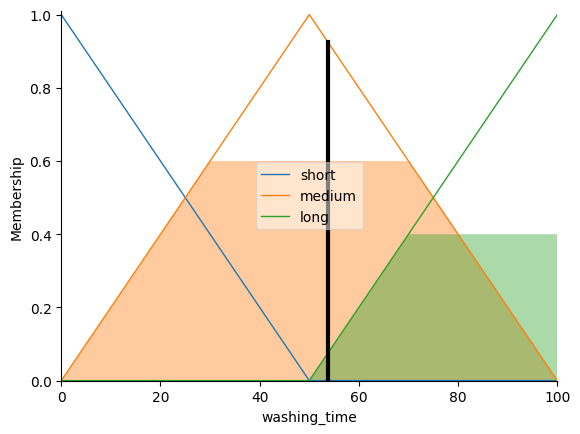

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input and output variables
dirtiness = ctrl.Antecedent(np.arange(0, 11, 1), 'dirtiness')
washing_time = ctrl.Consequent(np.arange(0, 101, 1), 'washing_time')

# Define membership functions
dirtiness['low'] = fuzz.trimf(dirtiness.universe, [0, 0, 5])
dirtiness['medium'] = fuzz.trimf(dirtiness.universe, [0, 5, 10])
dirtiness['high'] = fuzz.trimf(dirtiness.universe, [5, 10, 10])

washing_time['short'] = fuzz.trimf(washing_time.universe, [0, 0, 50])
washing_time['medium'] = fuzz.trimf(washing_time.universe, [0, 50, 100])
washing_time['long'] = fuzz.trimf(washing_time.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(dirtiness['low'], washing_time['short'])
rule2 = ctrl.Rule(dirtiness['medium'], washing_time['medium'])
rule3 = ctrl.Rule(dirtiness['high'], washing_time['long'])

# Create control system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
washing = ctrl.ControlSystemSimulation(washing_ctrl)

# Set input values
washing.input['dirtiness'] = 7

# Compute the result
washing.compute()

# Print the output
print('Washing Time:', washing.output['washing_time'])
washing_time.view(sim=washing)
